# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

In [0]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from numpy import linalg as LA


plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [0]:
opt = {
    'image_size': 32,
    'is_grayscale': True,
    'val_split': 0.75
}

### Load Dataset

In [0]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [6]:
# Loading the dataset
# eg.
dirpath = './dataset/Yale_face_database'
# dirpath = './dataset/IMFDB'
# dirpath = './dataset/IIIT-CFW'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (165, 32, 32)


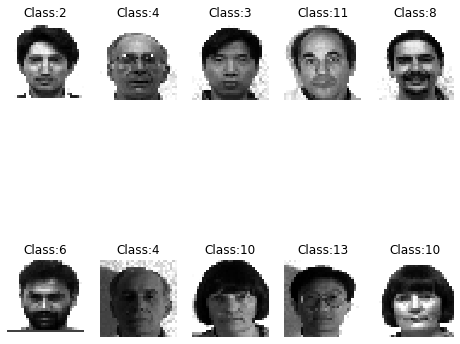

In [7]:
# Show sample images
ind = np.random.randint(0,y.shape[0],10)
disply_images(X[ind,...],y[ind], row=2,col=5,w=64,h=64)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [0]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [0]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k,pca

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [0]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree,fit_inverse_transform=True)
    X_k = kpca.fit_transform(X)
    return X_k,kpca

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [0]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k,lda

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [0]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return X_k,klda

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [0]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [0]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

Eigen faces are the name given to set of eigen vectors that are used in computer vision for solving the problem of face recognition. It is derived from the covariance matrix of the dataset. 

1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [0]:
# Compute your features 
# eg.
#X_3D = get_kernel_lda(X,y,32)
# using PCA Method
X_3D_pca,pca = get_pca(X,61)
# using KPCA Method
X_3D_kpca,kpca = get_kernel_pca(X,8,'rbf')
# # using lda Method
# X_3D_lda,lda = get_lda(X,y,32)
# #using kernel lda Method
# X_3D_klda,Klda = get_lda(X,y,256)
# x1 = lda.fit_transform(X)
#X_3D_lda,lda=get_lda(X,,32)
#print(kpca.get_params)
#X_inv_pca = kpca.inverse_transform(X_3D_kpca)
#reconstruct_X = np.reshape(X_inv_pca,(N,w,h))
# print(X_3D_lda)


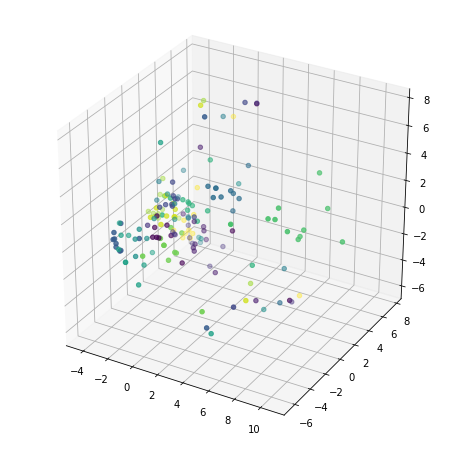

In [0]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_3D_pca[:,0],X_3D_pca[:,1],X_3D_pca[:,2],c=y)
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


for k= 61 We would be taking 95% of the eigen spectrum


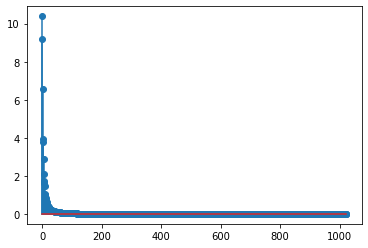

In [17]:
# Plot the eigen value spectrum 
# 


eig_val,eig_vec=linalg.eig(np.cov(np.transpose(X)))
eig_val=abs(eig_val)
plt.stem(abs(eig_val))
eig_sum=np.sum(eig_val)
cumsum=(np.cumsum(eig_val))/eig_sum
j=0
for i in cumsum:
  if i>=0.95:
    index=j 
   
    break
  j+=1

print('for k=',index,'We would be taking 95% of the eigen spectrum')

1(c). Reconstruct  the  image  back for each case


In [0]:
def reconstruct_images(method,X_3D,n,w,h):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    X_inv = method.inverse_transform(X_3D)
    reconstruct_X = np.reshape(X_inv,(N,w,h))
   
    # X_inv_kpca = kpca.inverse_transform(X_3D_kpca)
    # reconstruct_X = np.reshape(X_inv_kpca,(N,w,h))

   # pass
    #reconstruct_X = None
    
    return reconstruct_X  

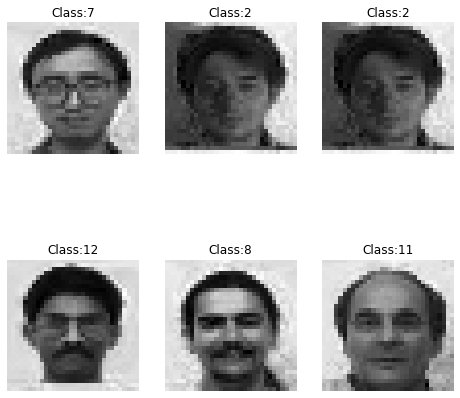

0.054545473337739805


In [19]:
# Display results 
# PCA
X_reconstructed_pca = reconstruct_images(pca,X_3D_pca,400,32,32)
# Kernel PCA
# X_reconstructed_kpca = reconstruct_images(kpca,X_3D_kpca,400,32,32)

# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed_pca[ind,...],y[ind],row=2,col=3)

# Show the reconstruction error
X_reconstructed_pca =  X_reconstructed_pca.reshape((N,H*W*C))

print(np.sqrt(np.mean((X - X_reconstructed_pca)**2)))
#print(X_reconstructed.shape) 

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers
##--------------------------------------------------------------------------------------------------------------------------------------------------------------
Ans. According to the empirical observations the order of classses from worst to best represented classes are 6 0 5 3 2 4 7 1 for IMFDB database. 

In [20]:
# code goes here
ind = range(8)
ind=list(range(0,400,50))
clas=[]
for i in ind:
  loss=np.sqrt(np.mean((X[i:i+50] - X_reconstructed_pca[i:i+50])**2))
  # print('loss for for c:',loss)
  clas.append(loss)
# print(max(clas))
cla=np.argsort(clas)[::-1]
print(cla)


[7 6 5 4 1 3 2 0]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [0]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 
from sklearn.neural_network import MLPClassifier
class Classifier():
    def __init__():
        super.__init__()
        clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=False,learning_rate=0.001,max_iter=200,activation='relu',momentum=0.9)
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True,
                            early_stopping=False,max_iter=200,activation='relu',momentum=0.9)
        #clf.fit(X_reconstruced,y)
        prediction = clf.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        from sklearn.metrics import confusion_matrix
        from sklearn.metrics import accuracy_score

        cm = confusion_matrix(pred,y)
        return cm
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
      
            
      
        """

    # def confusion(self,X)
        
        # Calculate Validation accuracy 
    
        # Calculate precision and recall 
        
        # Calculate F1-score
    
        return 

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# for pca and kpca
def classifier_pca(method,X):
  X_inv = method.inverse_transform(X)
  # test_size: what proportion of original data is used for test set
  train_img, test_img, train_lbl, test_lbl = train_test_split(X_inv,y, test_size=0.2, random_state=0)

  clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=False,
                              early_stopping=False,max_iter=50,activation='relu',momentum=0.9)
  clf.fit(train_img,train_lbl)
  prediction = clf.predict(test_img)
  #print(classification_report(test_lbl, prediction,))
  cm = confusion_matrix(prediction,test_lbl)
  print('confusion matrix')
  print(cm)
  class_report = classification_report(test_lbl,prediction)
  print(class_report)
  return accuracy_score(test_lbl, prediction)


In [64]:
acc_score_pca=classifier_pca(pca,X_3D_pca)
print(acc_score_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


confusion matrix
[[2 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         1
          

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [79]:
X_3D_kpca,kpca = get_kernel_pca(X,8)
acc_score_kpca=classifier_pca(kpca,X_3D_kpca)
print(acc_score_kpca)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 1 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 1 0 0 0 0 4 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [2 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 1 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.14      1.00      0.25         1
           4       0.50      1.00      0.67         1
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       1.00      0.67      0.80         3
       

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [80]:
# for lda
train_img, test_img, train_lbl, test_lbl = train_test_split(X,y, test_size=0.2, random_state=0)
train_img_lda,pred_lda = get_lda(train_img,train_lbl,32)
test_img_lda=pred_lda.fit_transform(train_img,train_lbl)
prediction=pred_lda.predict(test_img)
accu_score_lda=accuracy_score(test_lbl, prediction)
print('accuracy score for lda :',accu_score_klda)
cm = confusion_matrix(prediction,test_lbl)
print('confusion matrix')
print(cm)
class_report = classification_report(test_lbl,prediction)
print(class_report)




/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 15 - 1) = 14 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 15 - 1) = 14 co

accuracy score for lda : 0.9393939393939394
confusion matrix
[[3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         2
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         3
          11       1

In [82]:
# for klda
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(X,y, test_size=0.2, random_state=0)
train_img_klda,klda1 = get_kernel_lda(train_img,train_lbl,7,kernel='poly')
test_img_klda=klda1.fit_transform(train_img,train_lbl)
predict_klda1=klda1.predict(test_img)
accu_score_klda=accuracy_score(test_lbl, predict_klda1)
print(accu_score_klda)
cm = confusion_matrix(predict_klda1,test_lbl)
print('confusion matrix')
print(cm)
class_report = classification_report(test_lbl,prediction)
print(class_report)

0.9393939393939394
confusion matrix
[[3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         2
           8       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         3
          11       1.00      1.00      1.00  

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [83]:
#for vgg
# test_size: what proportion of original data is used for test set
features=get_vgg_features(dirpath)
n1=features.shape[0]
f_train_img, f_test_img, f_train_lbl, f_test_lbl = train_test_split(features,y[0:n1],test_size=0.2, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=False,
                              early_stopping=False,max_iter=50,activation='relu',momentum=0.9)
clf.fit(f_train_img,f_train_lbl)
prediction = clf.predict(f_test_img)
accu_score_vgg=accuracy_score(f_test_lbl, prediction)
cm = confusion_matrix(prediction,test_lbl)
print('confusion matrix')
print(cm)
class_report = classification_report(test_lbl,prediction)
print(class_report)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


confusion matrix
[[1 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 1 0 0 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 2 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         0
           2       0.33      0.33      0.33         3
           3       0.17      1.00      0.29         1
           4       0.00      0.00      0.00         1
           5       0.40      0.67      0.50         3
           6       1.00      0.67      0.80         3
           7       0.50      0.50      0.50         2
           8       1.00      0.33      0.50         3
       

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [85]:
#for resnet
# test_size: what proportion of original data is used for test set
features=get_resnet_features(dirpath)
n2=features.shape[0]
f_train_img, f_test_img, f_train_lbl, f_test_lbl = train_test_split(features,y[0:n1],test_size=0.2, random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=False,
                              early_stopping=False,max_iter=50,activation='relu',momentum=0.9)
clf.fit(f_train_img,f_train_lbl)
prediction = clf.predict(f_test_img)
accu_score_resnet=accuracy_score(f_test_lbl, prediction)
cm = confusion_matrix(prediction,test_lbl)
print('confusion matrix')
print(cm)
class_report = classification_report(test_lbl,prediction)
print(class_report)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


confusion matrix
[[3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          

In [88]:
Features=np.array(['Eigen Face','Kernel Face','Fisher Face','Fisher kernel face','vgg','resnet'])

Reduced_storage=[61,8,32,7,n1,n2]
Accuracies=np.array([acc_score_pca,acc_score_kpca,accu_score_lda,accu_score_klda,accu_score_vgg,accu_score_resnet])
pd.DataFrame({'Features':Features,'reduced storage':Reduced_storage,'Accuracies':Accuracies})

,Features,reduced storage,Accuracies
0,Eigen Face,61,0.909091
1,Kernel Face,8,0.363636
2,Fisher Face,32,0.939394
3,Fisher kernel face,7,0.939394
4,vgg,165,0.424242
5,resnet,165,0.969697


In [91]:
# For each dataset print the confusion matrix for the best model 
# Best model Kernel LDA for IMFDB
dirpath = './dataset/IMFDB'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
X = X.reshape((N,H*W*C)) 
train_img, test_img, train_lbl, test_lbl = train_test_split(X,y, test_size=0.2, random_state=0)
train_img_klda,klda1 = get_kernel_lda(train_img,train_lbl,7,kernel='poly')
test_img_klda=klda1.fit_transform(train_img,train_lbl)
predict_klda1=klda1.predict(test_img)
accu_score_klda=accuracy_score(test_lbl, predict_klda1)
print(accu_score_klda)
cm = confusion_matrix(predict_klda1,test_lbl)
print('confusion matrix')
print(cm)


Dataset shape: (400, 32, 32)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.6125
confusion matrix
[[ 7  3  1  0  0  0  2  1]
 [ 1  5  1  0  0  2  1  1]
 [ 1  3  7  0  1  0  0  1]
 [ 0  1  1  5  0  0  3  2]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 1  0  0  1  0  0  6  0]
 [ 0  0  1  0  0  0  1  5]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [92]:
# For each dataset print the confusion matrix for the best model 
# Best model Kernel LDA for IMFDB
dirpath = '/content/drive/My Drive/IIIT-CFW'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
X = X.reshape((N,H*W*C)) 
train_img, test_img, train_lbl, test_lbl = train_test_split(X,y, test_size=0.2, random_state=0)
train_img_klda,klda1 = get_kernel_lda(train_img,train_lbl,7,kernel='poly')
test_img_klda=klda1.fit_transform(train_img,train_lbl)
predict_klda1=klda1.predict(test_img)
accu_score_klda=accuracy_score(test_lbl, predict_klda1)
print(accu_score_klda)
cm = confusion_matrix(predict_klda1,test_lbl)
print('confusion matrix')
print(cm)


Dataset shape: (680, 32, 32)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.25
confusion matrix
[[1 0 0 1 0 1 0 0]
 [3 2 0 2 2 1 2 0]
 [0 2 8 3 5 5 4 2]
 [1 4 0 5 1 3 3 4]
 [1 1 1 1 8 3 3 5]
 [0 1 2 1 2 1 1 4]
 [1 0 0 4 1 6 4 1]
 [2 0 3 3 2 2 2 5]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

Dataset shape: (400, 32, 32)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


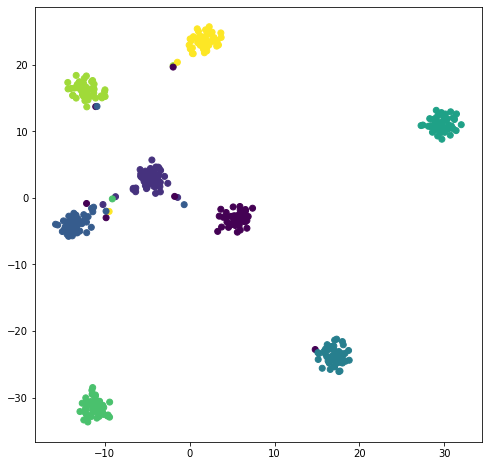

In [93]:
# Compute TSNE for different features and create a scatter plot
dirpath = '/content/drive/My Drive/IMFDB'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
X = X.reshape((N,H*W*C)) 

X,klda = get_kernel_lda(X,y,7,'poly')

k = 2 # Number of components in TSNE

# Compute
X_TSNE = TSNE(n_components=k).fit_transform(X)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)#, projection='3d')
ax.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y)
plt.show()


With the combination of LDA or K-LDA, with TSNE similar people are coming to at one place

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class FaceVerification():
    def __init__(self,k):
        #super.__init__()
        self.k = k
        clf = KNeighborsClassifier(n_neighbors=k)
        self.model=clf
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        y_pred = self.model.predict(X)
        acc_score=accuracy_score(class_id,y_pred)
        print(accuracy_score(class_id, y_pred))
        verification_results = np.chararray(X.shape[0],itemsize=5)
        for i in range (1,X.shape[0]):
       
           if(y_pred[i] == class_id[i]):
             verification_results[i] = 'yes'
           else:
             verification_results[i] = 'no'
        return verification_results
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.model.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        y_pred = self.model.predict(X_validate)
        acc_score=accuracy_score(y_validate,y_pred)
        print(accuracy_score(y_validate, y_pred))
        return 

In [0]:
# Create a train and validation split and show your results 

In [0]:
dirpath = '/content/drive/My Drive/Yale_face_database'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
X = X.reshape((N,H*W*C))
train_img, test_img, train_lbl, test_lbl = train_test_split(X,y, test_size=0.4, random_state=0)
#classifier = KNeighborsClassifier(n_neighbors=2)
k = 7
verification_result = np.chararray(X.shape[0],itemsize=5)
classifier=FaceVerification(k)
classifier.train(train_img,train_lbl)
train_img1, validate_img, train_lbl1, validate_lbl = train_test_split(train_img,train_lbl, test_size=0.4, random_state=0)
y_pred_valid = classifier.validate(validate_img,validate_lbl)
#print(accuracy_score(train_lbl[20:40], y_pred_valid))
verification_result = classifier.verify(test_img,test_lbl)
# if(y_pred==test_lbl[4:5]):
#     print('verified')
# else:
#     print('not verified')
print(verification_result)

Dataset shape: (165, 32, 32)
0.8
0.6818181818181818
['' b'no' b'yes' b'yes' b'no' b'no' b'yes' b'yes' b'yes' b'yes' b'yes'
 b'no' b'yes' b'yes' b'yes' b'yes' b'yes' b'yes' b'no' b'yes' b'no' b'yes'
 b'yes' b'no' b'no' b'yes' b'yes' b'yes' b'no' b'yes' b'yes' b'no' b'yes'
 b'yes' b'yes' b'no' b'yes' b'yes' b'no' b'no' b'yes' b'yes' b'yes' b'no'
 b'yes' b'no' b'yes' b'yes' b'yes' b'no' b'no' b'yes' b'no' b'yes' b'yes'
 b'yes' b'yes' b'yes' b'yes' b'yes' b'yes' b'yes' b'no' b'yes' b'no' b'no']


In [0]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)

### Extenstion / Application
    Create a system for any one of the following problems:
#     ##Gender prediction with combined IMFDB & IIIT-CFW is selected. 

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction  is Selected
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

Gender prediction of IMFDB and IIIT-CFW  using LDA feature prediction 

In [0]:
# cfw_dict = {'Amitabhbachan': 0,
#     'AamirKhan': 1,
#     'DwayneJohnson': 2,
#     'AishwaryaRai': 3,
#     'BarackObama': 4,
#     'NarendraModi': 5,
#     'ManmohanSingh': 6,
#     'VladimirPutin': 7}

def load_data_gndr(dir_path1,dir_path2):
    image_list = []
    y_list = []
    g_list = []
    #if "CFW" in dir_path1:
    label_dict1 = cfw_dict
    #elif "IMFDB" in dir_path2:
    label_dict3 = imfdb_dict
    #else:
    #    raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path1)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path1,filename))
            y = filename.split('_')[0]
            y = label_dict1[y]
            if y == 3 :
              g = 0
            else:
              g = 1
            image_list.append(im)
            y_list.append(y)
            g_list.append(g)
        else:
            continue

    for filename in sorted(os.listdir(dir_path2)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path2,filename))
            y = filename.split('_')[0]
            y = label_dict3[y]
            
            if y == 0 or y == 1 or y == 3 or y == 5 :
              g = 0
            else:
              g = 1
            image_list.append(im)
            y_list.append(y)
            g_list.append(g)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list,g_list
dirpath1 = '/content/drive/My Drive/IIIT-CFW'
dirpath2 = '/content/drive/My Drive/IMFDB'
X,y,g = load_data_gndr(dirpath1,dirpath2)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
X = X.reshape((N,H*W*C))




Dataset shape: (1080, 32, 32)


In [0]:
# Define your features
X1_lda,lda = get_lda(X,g,20)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1024, 2 - 1) = 1 compon

validate accuracy 0.9961538461538462
prediction accuracy 0.6574074074074074
confusion matrix
[[ 36  49]
 [ 25 106]]


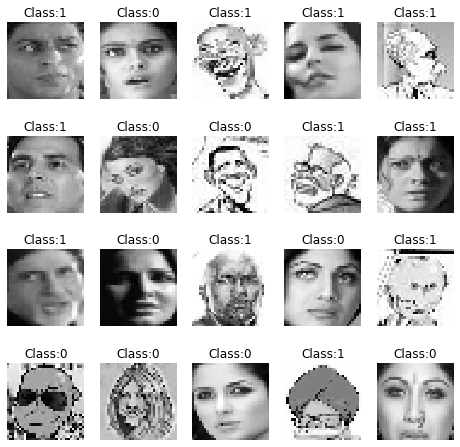

In [0]:
# Create your classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
train_img, test_img, train_lbl, test_lbl = train_test_split(X,g, test_size=0.2, random_state=0)
train_img_lda,pred_lda = get_lda(train_img,train_lbl,32)
test_img_lda=lda.fit_transform(train_img,train_lbl)

# Validate your classifier
train_img1, validate_img, train_lbl1, validate_lbl = train_test_split(train_img,train_lbl, test_size=0.3, random_state=0)
validate=lda.predict(validate_img)
validate_score=accuracy_score(validate_lbl,validate)
print('validate accuracy', validate_score)
N2=validate_img.shape[0]
validate_img1 = np.reshape(validate_img,(N2,32,32))
#ind = np.random.randint(0,validate.shape[0],6)
#disply_images(validate_img1[ind,...],validate[ind], row=2,col=3,w=64,h=64)

predict=lda.predict(test_img)
predict_score=accuracy_score(test_lbl,predict)
print('prediction accuracy', predict_score)
cm = confusion_matrix(predict,test_lbl)
print('confusion matrix')
print(cm)
N1=test_img.shape[0]
test_img1 = np.reshape(test_img,(N1,32,32))
ind = np.random.randint(0,predict.shape[0],20)
disply_images(test_img1[ind,...],predict[ind], row=4,col=5,w=64,h=64)


In above 20 test cases, few genders are predicted properly and few gender predicted wrongly. 

Accuracy is 65 %


*Self* problem :
Selected facial expression database fer2013, which has seven classes of expressins. Used LDA method for classification.


In [0]:
import pandas as pd
filname = '/content/drive/My Drive/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/drive/My Drive/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [0]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [0]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)


7


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
#y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
#y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


In [0]:
pca=PCA(0.8)
X_3D =  pca.fit_transform(X_train)
print(X_train.shape,X_3D.shape)
print('Principal Components shape = ', pca.components_.shape)
print('Variance Ratio = ', pca.explained_variance_ratio_)

plt.semilogx(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

In [0]:
train_img_lda,pred_lda = get_lda(X_train,y_train,256)
test_img_lda=pred_lda.fit_transform(X_train,y_train)
#predict=lda.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2304, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2304, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_componen

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=False,
                              early_stopping=False,max_iter=50,activation='relu',momentum=0.9)
clf.fit(X_3D[1:1024],y_train[1:1024])
prediction = clf.predict(X_test[1:100])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predict=pred_lda.predict(X_test[1:100])
predict_score=accuracy_score(y_test[1:100],predict)
print('prediction accuracy', predict_score)
cm = confusion_matrix(predict,y_test[1:100])
print('confusion matrix')
print(cm)

prediction accuracy 0.31313131313131315
confusion matrix
[[ 3  1  3  5  1  1  0]
 [ 0  1  0  1  0  0  0]
 [ 1  0  2  0  3  1  2]
 [ 4  0  6 10  3  2  5]
 [ 4  0  2  4  3  1  5]
 [ 1  0  0  0  1  9  2]
 [ 2  0  2  1  3  1  3]]
